In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head(25)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [5]:
#1. One-liner: Movie titles longer than 10 characters
[t for t in df[df['type'] == 'Movie']['title'] if len(t) > 10]


['Dick Johnson Is Dead',
 'My Little Pony: A New Generation',
 'The Starling',
 'Je Suis Karl',
 'Confessions of an Invisible Girl',
 "Europe's Most Dangerous Man: Otto Skorzeny in Spain",
 'Avvai Shanmughi',
 'Go! Go! Cory Carson: Chrissy Takes the Wheel',
 'Minsara Kanavu',
 'Ankahi Kahaniya',
 'The Father Who Moves Mountains',
 'The Stronghold',
 'Birth of the Dragon',
 'Jaws: The Revenge',
 'My Heroes Were Cowboys',
 'Training Day',
 'InuYasha the Movie 2: The Castle Beyond the Looking Glass',
 'InuYasha the Movie 3: Swords of an Honorable Ruler',
 'InuYasha the Movie 4: Fire on the Mystic Island',
 'InuYasha the Movie: Affections Touching Across Time',
 'Naruto Shippuden the Movie: Blood Prison',
 'Naruto Shippûden the Movie: Bonds',
 'Naruto Shippûden the Movie: The Will of Fire',
 'Naruto Shippuden: The Movie',
 'Naruto Shippuden: The Movie: The Lost Tower',
 'Naruto the Movie 2: Legend of the Stone of Gelel',
 'Naruto the Movie 3: Guardians of the Crescent Moon Kingdom',
 'Naru

In [6]:
#2. Titles starting with "S" (ignore case)
df[df['title'].str.lower().str.startswith('s')]['title']


,title
7,Sankofa
32,Sex Education
33,Squid Game
46,Safe House
67,Saved by the Bell
...,...
8139,Sweet Virginia
8140,Swiss Army Man
8141,Sword Master
8142,Sword Masters: Two Champions of Shaolin


In [11]:
#3. NumPy array from release_year + stats
years = df['release_year'].to_numpy()
print("Mean:", round(np.mean(years), 4))
print("Median:", np.median(years))
print("Std Dev:", np.std(years))



Mean: 2014.1802
Median: 2017.0
Std Dev: 8.818811417623195


In [13]:
#4. Count shows released before 2000 (loop)
count = (df['release_year'] < 2000).sum()
print("Number of shows released before 2000:" , count)


Number of shows released before 2000: 525


In [16]:
#5. New column title_length (using apply)
df['title_length'] = df['title'].map(lambda x: len(str(x)))
print(df[['title', 'title_length']].head())


                   title  title_length
0   Dick Johnson Is Dead            20
1          Blood & Water            13
2              Ganglands             9
3  Jailbirds New Orleans            21
4           Kota Factory            12


In [17]:
#6. Replace missing directors with "Not Available" (Movies only)
df.loc[df['type'] == 'Movie', 'director'] = df.loc[df['type'] == 'Movie', 'director'].fillna('Not Available')
print(df[['title', 'director']].head())

                   title         director
0   Dick Johnson Is Dead  Kirsten Johnson
1          Blood & Water              NaN
2              Ganglands  Julien Leclercq
3  Jailbirds New Orleans              NaN
4           Kota Factory              NaN


In [18]:
#7. Use filter() to get shows added after 2018
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

filtered = list(
    filter(
        lambda x: x.year > 2018 if pd.notnull(x) else False,
        df['date_added']
    )
)
print("Total shows added after 2018:", len(filtered))


Total shows added after 2018: 5375


In [20]:
#8. 5×3 NumPy array & halve even numbers
arr = np.random.randint(1, 101, (5, 3))
print("Original Array:\n", arr)

arr = np.where(arr % 2 == 0, arr / 2, arr)
print("\nModified Array (even halved):\n", arr)


Original Array:
 [[ 72  96  26]
 [ 60  22  53]
 [  7  90  60]
 [ 58 100  15]
 [ 96   4  25]]

Modified Array (even halved):
 [[36. 48. 13.]
 [30. 11. 53.]
 [ 7. 45. 30.]
 [29. 50. 15.]
 [48.  2. 25.]]


In [24]:
#9. Rows where listed_in contains both Drama & Crime
filtered_df = df[
    df['listed_in'].str.contains('Drama', na=False) &
    df['listed_in'].str.contains('Crime', na=False)
]

print(filtered_df[['title', 'listed_in']].head())


                                    title  \
17                        Falsa identidad   
82                                Lucifer   
198  King of Boys: The Return of the King   
222                             Clickbait   
260                          The Defeated   

                                             listed_in  
17   Crime TV Shows, Spanish-Language TV Shows, TV ...  
82              Crime TV Shows, TV Comedies, TV Dramas  
198  Crime TV Shows, International TV Shows, TV Dramas  
222            Crime TV Shows, TV Dramas, TV Mysteries  
260  Crime TV Shows, International TV Shows, TV Dramas  


In [25]:
#10. Lambda to extract year from date_added
get_year = lambda x: x.year if pd.notnull(x) else np.nan
df['added_year'] = df['date_added'].apply(get_year)
print(df[['title', 'date_added', 'added_year']].head())

                   title date_added  added_year
0   Dick Johnson Is Dead 2021-09-25      2021.0
1          Blood & Water 2021-09-24      2021.0
2              Ganglands 2021-09-24      2021.0
3  Jailbirds New Orleans 2021-09-24      2021.0
4           Kota Factory 2021-09-24      2021.0


In [26]:
#11. Function: top n countries by number of titles
def top_country(df, n):
    return df['country'].dropna().value_counts().head(n)

print(top_country(df, 5))


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: count, dtype: int64


In [44]:
# 12. First 5 titles with "love" in description
love_titles = df[df['description'].str.contains('love', case=False, na=False)]['title'].head(5)
print("Titles containing 'love':", love_titles.tolist())

Titles containing 'love': ['Jeans', 'Love on the Spectrum', 'Minsara Kanavu', 'Grown Ups', 'Ankahi Kahaniya']


In [28]:
#13. Replace NaN with mean
arr = np.array([10, 20, np.nan, 40, 50])
arr[np.isnan(arr)] = np.nanmean(arr)
print(arr)


[10. 20. 30. 40. 50.]


In [45]:
# 14. NumPy stacking
sales = np.array([100, 200, 300])
profit = np.array([40, 50, 60])
stacked = np.vstack((sales, profit))
print("Stacked array:\n", stacked)

Stacked array:
 [[100 200 300]
 [ 40  50  60]]


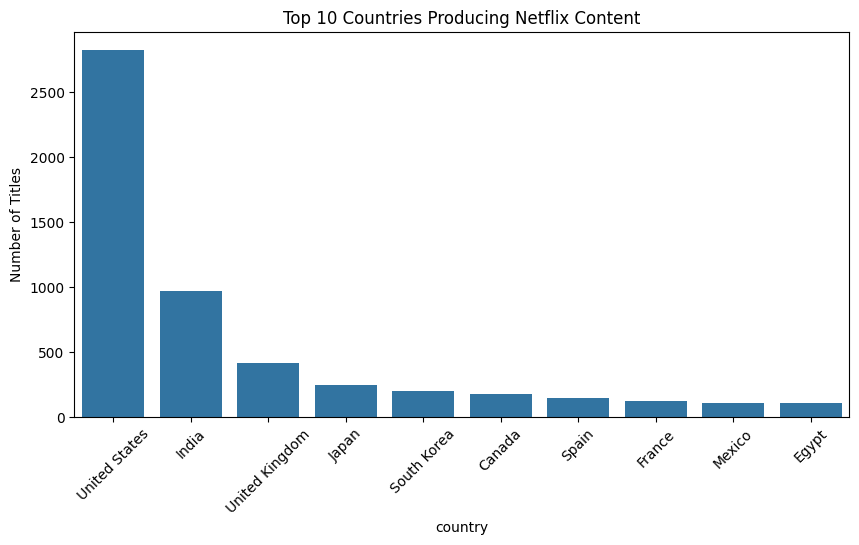

In [46]:
# 15. Bar chart of top 10 countries using Seaborn
top10 = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index, y=top10.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Producing Netflix Content')
plt.show()


In [43]:
# 16. While loop to print random titles until duration > 100
import random
selected_titles = []
while True:
    row = df.sample(1).iloc[0]
    # Only consider movies for duration comparison
    if row['type'] == 'Movie':
        duration_str = row['duration']
        if isinstance(duration_str, str) and 'min' in duration_str:
            try:
                duration_minutes = int(duration_str.replace(' min', ''))
                selected_titles.append(row['title'])
                if duration_minutes > 100:
                    break
            except ValueError:
                # Handle cases where conversion to int fails, e.g., if 'duration' is not purely numeric before 'min'
                pass
        else:
            selected_titles.append(row['title']) # Append title even if duration isn't 'X min'
    else:
        selected_titles.append(row['title']) # Append TV show title without duration check

print("Selected titles until one >100 min:", selected_titles)

Selected titles until one >100 min: ['#cats_the_mewvie', 'Accomplice', 'A Russell Peters Christmas', 'Moesha', 'Man of Tai Chi']


In [36]:
#17. Movies vs TV Shows per release decade

df = pd.read_csv('netflix_titles.csv')

# Create a new column for the decade
df['release_decade'] = (df['release_year'] // 10) * 10

# Group by decade and type, then count
grouped = df.groupby(['release_decade', 'type']).size().unstack()

# Print the result
print(grouped)

type             Movie  TV Show
release_decade                 
1920               NaN      1.0
1940              13.0      2.0
1950              11.0      NaN
1960              23.0      2.0
1970              66.0      4.0
1980             122.0      7.0
1990             241.0     33.0
2000             677.0    133.0
2010            4184.0   1743.0
2020             794.0    751.0


In [47]:
# 18. Countries with more than 200 titles
country_counts = df['country'].value_counts()
countries_200plus = country_counts[country_counts > 200]
print("Countries with >200 titles:\n", countries_200plus)

Countries with >200 titles:
 country
United States     2818
India              972
United Kingdom     419
Japan              245
Name: count, dtype: int64


In [49]:
from functools import reduce
# 19. Sum of release_year using reduce
sum_years = reduce(lambda x, y: x+y, df['release_year'])
print("Sum of release years:", sum_years)

Sum of release years: 17738885


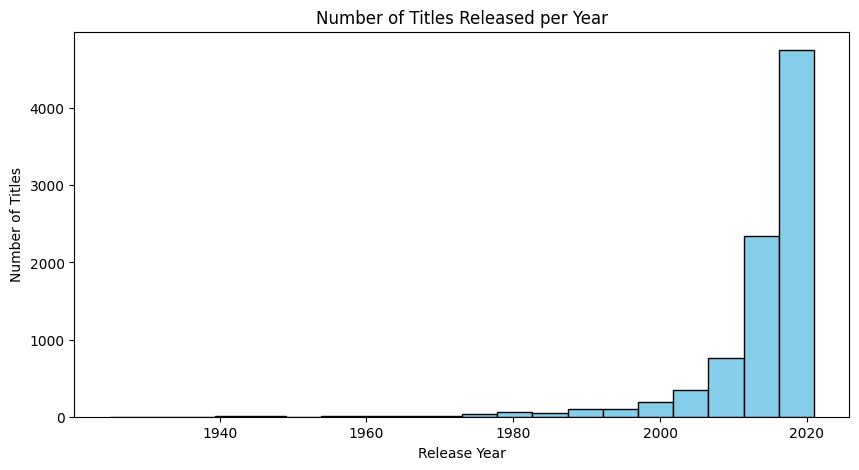

In [50]:
# 20. Histogram of titles per release year
plt.figure(figsize=(10,5))
plt.hist(df['release_year'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Released per Year')
plt.show()